In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup  #to parse data from FInViz
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lasta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Collection -- Phase 1

Collecting News of Stocks using API to collect news reading from the HTML

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
news = {}
tickers = ['AMZN', 'TSLA', 'GOOG','PEP','DDOG','SONY','AAPL','COST','JPM','TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']#'TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']
for i in tickers:
    url = finviz_url + i
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)  #read the content in HTML
    news_headline = html.find(id='news-table')
    news[i] = news_headline #building a dictionary

In [3]:
news

{'AMZN': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Mar-30-23 06:30PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/m/b7124aa8-e453-399e-9416-91d00d618573/why-amazon-stock-shot-nearly.html" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/b7124aa8-e453-399e-9416-91d00d618573/why-amazon-stock-shot-nearly.html');" rel="nofollow" target="_blank">Why Amazon Stock Shot Nearly 2% Higher Today</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
 <tr><td align="right" width="130">05:22PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/video/streaming-platforms-vie-mlb-broadcast-212205667.html" onclick="trackAndOpenNews

In [4]:
amzn = news['AMZN']
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    td_text = table_row.td.text
    print(td_text)
    continue
    if td_text.split("-")[0] in ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]:
        a_text = table_row.a.text
        print(a_text)
        print(td_text)
    if i == 1000000:
        break

Mar-21-23 04:24PM
04:15PM
03:39PM
03:31PM
12:14PM
11:00AM
11:00AM
10:28AM
09:56AM
09:41AM
09:41AM
09:39AM
09:27AM
08:15AM
07:33AM
07:00AM
06:53AM
06:53AM
05:50AM
05:30AM
05:26AM
05:10AM
05:06AM
12:00AM
Mar-20-23 07:50PM
06:53PM
05:59PM
05:45PM
05:16PM
04:43PM
04:34PM
04:32PM
04:24PM
04:24PM
04:09PM
03:33PM
02:43PM
02:24PM
12:53PM
12:45PM
12:35PM
12:29PM
12:16PM
12:07PM
11:29AM
11:13AM
11:05AM
11:00AM
10:54AM
10:52AM
10:48AM
10:00AM
09:41AM
08:49AM
08:14AM
08:00AM
06:00AM
05:50AM
05:50AM
Mar-19-23 08:00AM
Mar-18-23 06:15PM
03:00PM
09:37AM
08:30AM
07:00AM
06:00AM
Mar-17-23 06:49PM
04:54PM
04:35PM
12:05PM
09:25AM
08:00AM
07:35AM
05:57AM
05:40AM
05:30AM
05:07AM
Mar-16-23 06:01PM
05:30PM
04:21PM
01:08PM
11:05AM
10:15AM
08:10AM
07:43AM
06:39AM
05:40AM
Mar-15-23 03:29PM
03:04PM
12:56PM
11:00AM
10:24AM
10:08AM
09:00AM
07:30AM
07:00AM
06:30AM
06:26AM
06:00AM
05:06AM
Mar-14-23 06:33PM
03:02PM
03:00PM


In [5]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ["META","EBAY","MSFT","KO","NVDA","PFE","MRK","XOM","BAC","LLY","MA","UNH","PG","DE","UL","HDB","AMGN","LMT","BA"]
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    print(ticker) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table


META
EBAY
MSFT
KO
NVDA
PFE
MRK
XOM
BAC
LLY
MA
UNH
PG
DE
UL
HDB
AMGN
LMT
BA


In [7]:
tickers_2=['AMZN','NFLX', 'TSLA', 'GOOG','PEP','DDOG','SONY','AAPL','COST','JPM','TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']
for ticker in tickers_2:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    print(ticker) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

AMZN
NFLX
TSLA
GOOG
PEP
DDOG
SONY
AAPL
COST
JPM
TSM
WMT
JPM
PG
HD
META
ABBV
BABA


In [10]:
# Read one single day of headlines for ‘AMZN’ 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
  # Read the text of the element ‘a’ into ‘link_text’
  a_text = table_row.a.text
  # Read the text of the element ‘td’ into ‘data_text’
  td_text = table_row.td.text
  # Print the contents of ‘link_text’ and ‘data_text’ 
  print(a_text)
  print(td_text)
  # Exit after printing 4 rows of data
  if i == 3:
   break

Big Tech companies could see even more layoffs ahead: Analyst
Mar-21-23 04:24PM
Why Rivian, Ford, and General Motors Jumped Today
04:15PM
Amazon looking at every nook and cranny to improve efficiencies, analyst says
03:39PM
Why Amazon Stock Rallied on Tuesday
03:31PM


In [11]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        if x.a:
          text = x.a.get_text()
        else:continue 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
len(parsed_news)

3400

In [12]:
years={"23":"2023","22":"2022","21":"2021","20":"2020"}
months={"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}
for x in range(len(parsed_news)):
  splitted=parsed_news[x][1].split("-")
  parsed_news[x][1]=years[splitted[-1]]+"-"+months[splitted[0]]+"-"+splitted[1]

In [14]:
parsed_news

[['META',
  '2023-03-21',
  '04:24PM',
  'Big Tech companies could see even more layoffs ahead: Analyst'],
 ['META',
  '2023-03-21',
  '03:45PM',
  'Zuckerberg, Meta are sued for failing to address sex trafficking, child exploitation'],
 ['META',
  '2023-03-21',
  '03:41PM',
  'Zuckerberg, Meta are sued for failing to address sex trafficking, child exploitation'],
 ['META',
  '2023-03-21',
  '03:19PM',
  'TikTok: How did the wildly popular app end up in danger of a US ban'],
 ['META',
  '2023-03-21',
  '03:05PM',
  'UPDATE 1-Kenyan judge temporarily blocks mass layoff of Facebook moderators'],
 ['META',
  '2023-03-21',
  '02:00PM',
  'Kenyan judge temporarily blocks mass layoff of Facebook moderators'],
 ['META',
  '2023-03-21',
  '01:35PM',
  'What Would a US Ban on TikTok Mean for Businesses?'],
 ['META',
  '2023-03-21',
  '01:25PM',
  'Kenyan judge temporarily blocks mass layoff of Facebook moderators'],
 ['META',
  '2023-03-21',
  '11:45AM',
  'U.S. State-Government Websites Use Ti

In [13]:
comps=tickers+tickers_2

In [14]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.3 MB/s eta 0:00:00


# Stock prices along with News is downloading....
# will take around 3 minutes

In [15]:
# Importing the yfinance package
import yfinance as yf
# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-03-01'
dat=[]
# Set the ticker
for comp in comps:   ### for comp in comps
  ticker = comp
  # Get the data
  data = yf.download(ticker, start_date, end_date)
  data["Date"] = data.index
  data = data[["Date", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
  data.reset_index(drop=True, inplace=True)
  data=data.iloc[::-1]
  cr=[]
  for a in parsed_news:
    if a[0]==comp:
      cr.append(a)

  for el in cr:
    for ind,row in data.iterrows():
      if str(row["Date"]).split(" ")[0]==el[1]:
        curr=0
        if row["Close"]-row["Open"]>=0:
          curr=1
        dat.append([str(row["Date"]),el[-1],row["Open"],row["High"],row["Low"],curr,comp])
        break
  # Print the last 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Date,Open,High,Low,Close,Adj Close,Volume
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,218.000000,11959100
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,217.630005,9388000
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,216.639999,11885500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,217.000000,8604500
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,219.770004,15873500


In [16]:
stock_and_message=pd.DataFrame(dat,columns=["Date","News","open_stock","high_stock","low_stock","status","company"])

In [17]:
cached_df=stock_and_message

In [18]:
stock_and_message.company.unique()

array(['EBAY', 'KO', 'MRK', 'XOM', 'BAC', 'LLY', 'MA', 'UNH', 'PG', 'DE',
       'UL', 'HDB', 'AMGN', 'LMT', 'NFLX', 'GOOG', 'PEP', 'DDOG', 'SONY',
       'TSM', 'HD', 'ABBV', 'BABA'], dtype=object)

In [19]:
stock_and_message["btc_open"]=0
stock_and_message["btc_high"]=0
stock_and_message["btc_low"]=0
stock_and_message["btc_volume"]=0

In [20]:
stock_and_message

,Date,News,open_stock,high_stock,low_stock,status,company,btc_open,btc_high,btc_low,btc_volume
0,2023-02-28 00:00:00,6 Ways To Cut Back Your Online Shopping at Ama...,45.709999,46.310001,45.580002,1,EBAY,0,0,0,0
1,2023-02-28 00:00:00,Analyst Report: eBay Inc.,45.709999,46.310001,45.580002,1,EBAY,0,0,0,0
2,2023-02-28 00:00:00,A Bull Market Is Coming: 3 Reasons to Buy eBay...,45.709999,46.310001,45.580002,1,EBAY,0,0,0,0
3,2023-02-27 00:00:00,Palantir joins growing list of tech companies ...,45.320000,45.849998,45.080002,1,EBAY,0,0,0,0
4,2023-02-27 00:00:00,"Market Digest: UAA, ALB, EBAY, HOLX, INCY, INT...",45.320000,45.849998,45.080002,1,EBAY,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1123,2023-02-23 00:00:00,Alibaba Survived a Tech Crackdown. Now It Must...,100.099998,100.470001,92.129997,0,BABA,0,0,0,0
1124,2023-02-23 00:00:00,"Alibaba Reduced Workforce by 19,000 in Covid-C...",100.099998,100.470001,92.129997,0,BABA,0,0,0,0
1125,2023-02-23 00:00:00,Alibaba Stock Rips Higher On Bullish Q3 Result...,100.099998,100.470001,92.129997,0,BABA,0,0,0,0
1126,2023-02-23 00:00:00,Alibaba stock rallies after earnings beat,100.099998,100.470001,92.129997,0,BABA,0,0,0,0


# Crypto Currency Data collection

will run for approx 1 min

In [21]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-03-01'
ticker="BTC-USD"
cryptoData = yf.download(ticker, start_date, end_date)
cryptoData["BtcDate"] = cryptoData.index
cryptoData = cryptoData[["BtcDate", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
cryptoData.reset_index(drop=True, inplace=True)
cryptoData=cryptoData.iloc[::-1]

for index,row in stock_and_message.iterrows():
  for n,r in cryptoData.iterrows():
    if str(row["Date"])==str(r["BtcDate"]):
      stock_and_message.loc[index, 'btc_open']=r["Open"]
      stock_and_message.loc[index, 'btc_high']=r["High"]
      stock_and_message.loc[index, 'btc_low']=r["Low"]
      stock_and_message.loc[index, 'btc_volume']=r["Volume"]
      break

[*********************100%***********************]  1 of 1 completed


In [22]:
cryptoData.head()

,BtcDate,Open,High,Low,Close,Adj Close,Volume
1154,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
1153,2023-02-27,23561.451172,23857.890625,23205.878906,23522.871094,23522.871094,22660763494
1152,2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842
1151,2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565
1150,2023-02-24,23946.007812,24103.705078,23007.072266,23198.126953,23198.126953,26811744928


In [23]:
stock_and_message.head()

,Date,News,open_stock,high_stock,low_stock,status,company,btc_open,btc_high,btc_low,btc_volume
0,2023-02-28 00:00:00,6 Ways To Cut Back Your Online Shopping at Ama...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434
1,2023-02-28 00:00:00,Analyst Report: eBay Inc.,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434
2,2023-02-28 00:00:00,A Bull Market Is Coming: 3 Reasons to Buy eBay...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434
3,2023-02-27 00:00:00,Palantir joins growing list of tech companies ...,45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494
4,2023-02-27 00:00:00,"Market Digest: UAA, ALB, EBAY, HOLX, INCY, INT...",45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494


# Gold Data Collection

In [24]:
stock_and_message["gold_open"]=0
stock_and_message["gold_high"]=0
stock_and_message["gold_low"]=0
stock_and_message["gold_volume"]=0

In [25]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-03-01'
ticker="GC=F"
goldData = yf.download(ticker, start_date, end_date)
goldData["GoldDate"] = goldData.index
goldData = goldData[["GoldDate", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
goldData.reset_index(drop=True, inplace=True)
goldData=goldData.iloc[::-1]

for index,row in stock_and_message.iterrows():
  for n,r in goldData.iterrows():
    if str(row["Date"])==str(r["GoldDate"]):
      stock_and_message.loc[index, 'gold_open']=r["Open"]
      stock_and_message.loc[index, 'gold_high']=r["High"]
      stock_and_message.loc[index, 'gold_low']=r["Low"]
      stock_and_message.loc[index, 'gold_volume']=r["Volume"]
      break

[*********************100%***********************]  1 of 1 completed


# Sentiment analysis

In [26]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.9 MB/s eta 0:00:00


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [28]:
list_of_news=list(stock_and_message.News)

In [29]:
compound_sentiment_scores=[]
for el in list_of_news:
  compound_sentiment_scores.append(sentimentAnalyser.polarity_scores(el)["compound"])
len(compound_sentiment_scores)

1128

In [30]:
stock_and_message["Compound_sentiment_score"]=compound_sentiment_scores

In [31]:
stock_and_message.head()

,Date,News,open_stock,high_stock,low_stock,status,company,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,2023-02-28 00:00:00,6 Ways To Cut Back Your Online Shopping at Ama...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.1027
1,2023-02-28 00:00:00,Analyst Report: eBay Inc.,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
2,2023-02-28 00:00:00,A Bull Market Is Coming: 3 Reasons to Buy eBay...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
3,2023-02-27 00:00:00,Palantir joins growing list of tech companies ...,45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.1779
4,2023-02-27 00:00:00,"Market Digest: UAA, ALB, EBAY, HOLX, INCY, INT...",45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.0000


# Coorelation between stock and sentiment score

In [32]:
import plotly.express as px

In [33]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "Compound_sentiment_score",
          y = "open_stock",

          title = "Showing relation between open_stock,Compound_sentiment_score and status<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

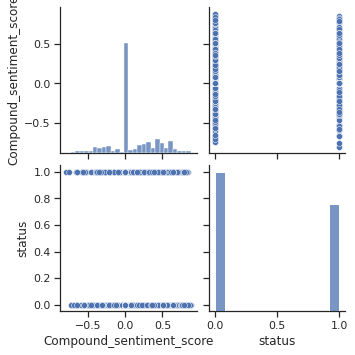

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(stock_and_message[["Compound_sentiment_score","status"]])
plt.show()

In [35]:
import numpy as np

coorelation=np.corrcoef(stock_and_message[["status","Compound_sentiment_score"]]);
coorelation

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning:

invalid value encountered in true_divide



array([[ 1.,  1.,  1., ..., nan, nan, -1.],
       [ 1.,  1.,  1., ..., nan, nan, -1.],
       [ 1.,  1.,  1., ..., nan, nan, -1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [-1., -1., -1., ..., nan, nan,  1.]])

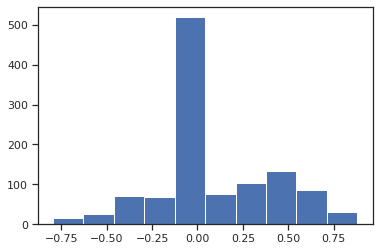

In [36]:
plt.hist(stock_and_message.Compound_sentiment_score);

In [37]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "status",
          y = "Compound_sentiment_score",

          title = "Showing relation between Compound_sentiment_score and status<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

In [38]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "low_stock",
          y = "high_stock",

          title = "Showing relation between high_stock and low_stock<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

In [39]:
stock_and_message.isnull().any()

Date                        False
News                        False
open_stock                  False
high_stock                  False
low_stock                   False
status                      False
company                     False
btc_open                    False
btc_high                    False
btc_low                     False
btc_volume                  False
gold_open                   False
gold_high                   False
gold_low                    False
gold_volume                 False
Compound_sentiment_score    False
dtype: bool

# Model Training  -- Phase 2

In [40]:
import tensorflow as tf

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
stock_and_message.columns

Index(['Date', 'News', 'open_stock', 'high_stock', 'low_stock', 'status',
       'company', 'btc_open', 'btc_high', 'btc_low', 'btc_volume', 'gold_open',
       'gold_high', 'gold_low', 'gold_volume', 'Compound_sentiment_score'],
      dtype='object')

In [43]:
df_x=stock_and_message.drop(columns=["Date","News","status"])
df_y=stock_and_message.status

In [44]:
df_x.head()

,open_stock,high_stock,low_stock,company,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,45.709999,46.310001,45.580002,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.1027
1,45.709999,46.310001,45.580002,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
2,45.709999,46.310001,45.580002,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
3,45.320000,45.849998,45.080002,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.1779
4,45.320000,45.849998,45.080002,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.0000


In [46]:
df_x=df_x.drop(columns=["company"])/df_x.drop(columns=["company"]).max()

In [47]:
df_x.head(4)

,open_stock,high_stock,low_stock,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,0.091429,0.091612,0.091956,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,-0.116612
1,0.091429,0.091612,0.091956,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,0.000000
2,0.091429,0.091612,0.091956,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,0.000000
3,0.090649,0.090702,0.090948,0.384235,0.382222,0.388740,0.179338,0.916570,0.918718,0.923097,0.003952,0.201998


In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=43)

In [49]:

tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dropout(.2),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
     tf.keras.layers.Dropout(.2),
     tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model.fit(x_train,y_train, epochs=500)

Epoch 1/500
29/29 [==============================] - 2s 4ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 2/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5654
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5654
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5654
Epoch 5/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5654
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5654
Epoch 7/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.5654
Epoch 8/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5654
Epoch 9/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5654
Epoch 10/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5654
Epoch 11/

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 40)                2040      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1312      
                                                                 
 dense_4 (Dense)             (None, 16)                5

# Model Evaluation

In [51]:
accuracy_of_model=model.evaluate(x_test,y_test)
print("Accuracy of model is: ",accuracy_of_model)

8/8 [==============================] - 0s 3ms/step - loss: 0.8342 - accuracy: 0.5752
Accuracy of model is:  [0.8341858386993408, 0.5752212405204773]


# Predictions

In [52]:
predictions=model.predict(x_test[:10])
success_count=0
failure_count=0
for el in predictions:
 if el>=0.5:
   success_count+=1
 else:
    failure_count+=1

1/1 [==============================] - 0s 123ms/step


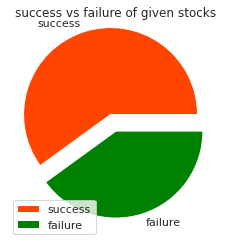

In [53]:
import matplotlib.pyplot as plt

y = [success_count,failure_count]
mylabels = ["success", "failure"]
myexplode = [0.2,0]
mycolors = ["orangered","green"]
plt.pie(y, labels = mylabels, explode = myexplode,colors=mycolors)
plt.title("success vs failure of given stocks")
plt.legend()
plt.show() 

# Phase 3-- Deployment 

To improve model performance you can add news from political sectors rather than just from fiviniz, however there are lots of paid apis available for getting news.

In USA The political situation, negotiations between countries or companies, product breakthroughs, mergers and acquisitions, and other unforeseen events can impact stocks and the stock market prices.

In [54]:
# stock folder is made in current directory which contains weights and every information of the model
model.save("./Stock")

# Changes Made:

In [55]:
rev_df=cached_df[::-1]

In [56]:
rev_df.tail()

,Date,News,open_stock,high_stock,low_stock,status,company,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
4,2023-02-27 00:00:00,"Market Digest: UAA, ALB, EBAY, HOLX, INCY, INT...",45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.0000
3,2023-02-27 00:00:00,Palantir joins growing list of tech companies ...,45.320000,45.849998,45.080002,1,EBAY,23561.451172,23857.890625,23205.878906,22660763494,1811.599976,1817.5,1808.900024,829,0.1779
2,2023-02-28 00:00:00,A Bull Market Is Coming: 3 Reasons to Buy eBay...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
1,2023-02-28 00:00:00,Analyst Report: eBay Inc.,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
0,2023-02-28 00:00:00,6 Ways To Cut Back Your Online Shopping at Ama...,45.709999,46.310001,45.580002,1,EBAY,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.1027


In [66]:
companies=['LMT', 'NFLX', 'GOOG', 'PEP', 'DDOG', 'SONY',
       'TSM', 'HD', 'ABBV', 'BABA']

In [82]:
list_of_news=list(rev_df["News"])
list_of_date=list(rev_df["Date"])
list_of_company=list(rev_df["company"])
list_of_stock=list(rev_df["open_stock"])
list_of_high_stock=list(rev_df["high_stock"])
list_of_low_stock=list(rev_df["low_stock"])
trackIndex=0
sentiment_list=[]
for com in companies:
  for x in range(len(list_of_news)):
    if list_of_company[x]==com:
      sentiment_list.append([sentimentAnalyser.polarity_scores(list_of_news[x])["compound"],com,list_of_date[x],list_of_news[x],list_of_high_stock[x],list_of_low_stock[x],list_of_stock[x]])


In [83]:
sentiment_list[0]

[0.296,
 'LMT',
 '2023-02-09 00:00:00',
 'Spirit AeroSystems readies for portfolio-changing defense helicopter programs',
 474.3399963378906,
 468.20001220703125,
 472.42999267578125]

# Plotting Sentiment News vs Date for 10 companies

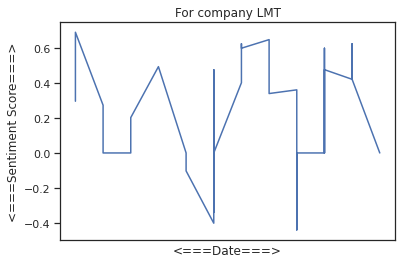

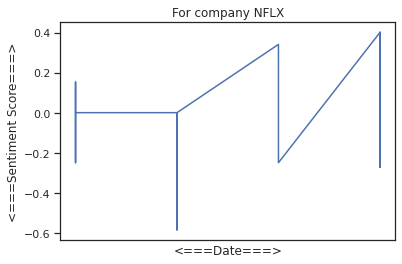

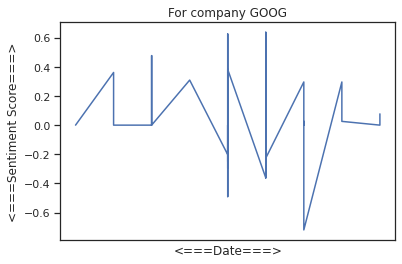

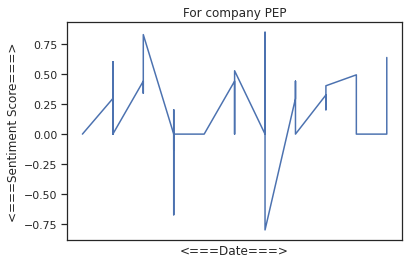

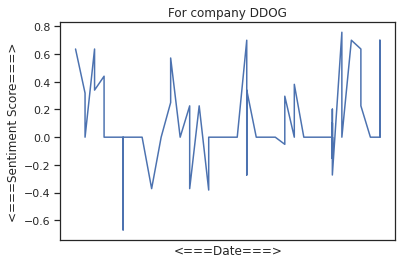

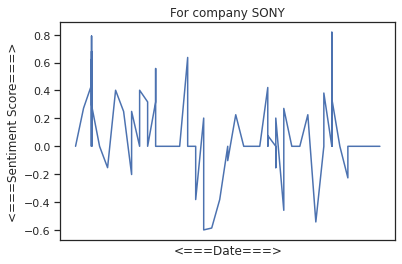

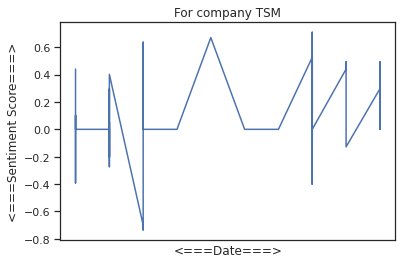

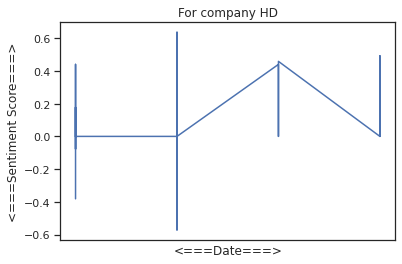

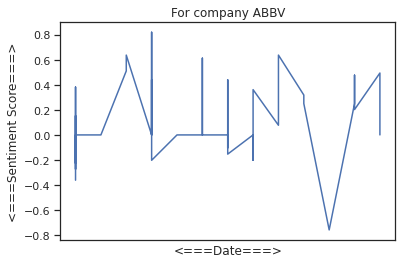

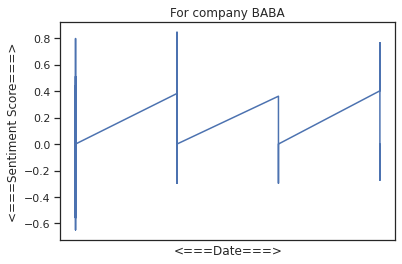

In [69]:
for com in companies:
  inp=[]
  label=[]
  for el in sentiment_list:
    if el[1]==com:
      inp.append(el[2])
      label.append(el[0])
  plt.plot(inp,label)
  plt.xticks([])
  plt.xlabel("<===Date===>")
  plt.ylabel("<===Sentiment Score===>")
  plt.title(f"For company {com}")
  plt.show()
  print("\n\n")


# plotting Stock vs Date

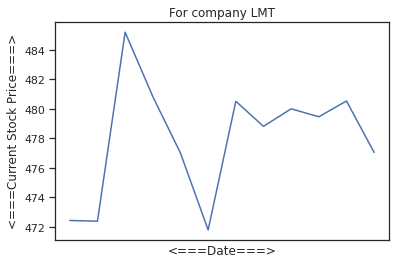

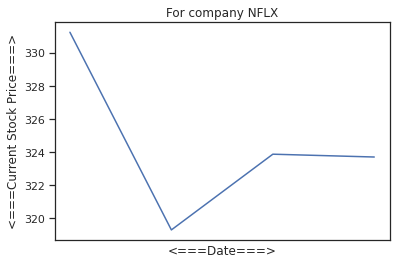

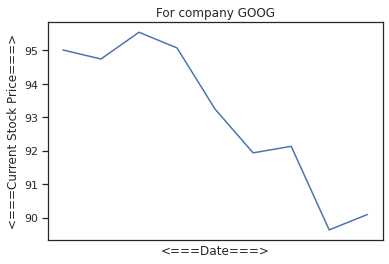

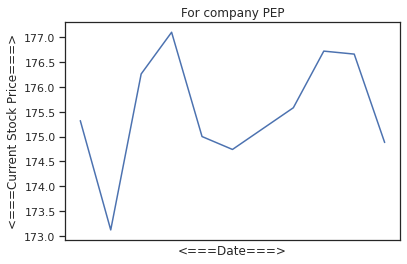

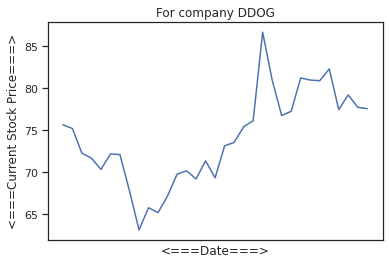

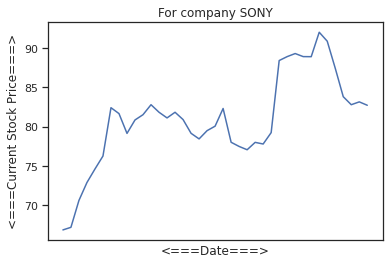

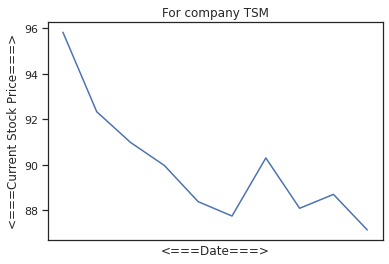

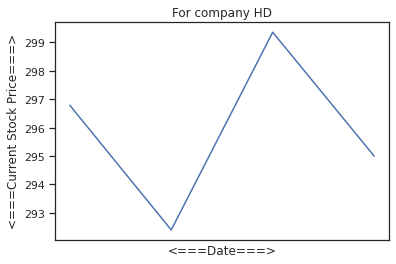

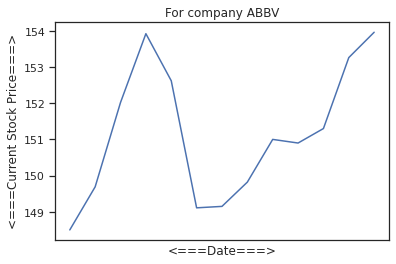

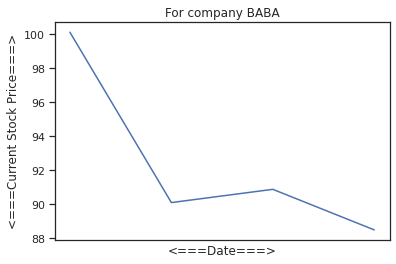

In [70]:
for com in companies:
  inp=[]
  label=[]
  for el in sentiment_list:
    if el[1]==com:
      inp.append(el[2])
      label.append(el[-1])
  plt.plot(inp,label)
  plt.xticks([])
  plt.xlabel("<===Date===>")
  plt.ylabel("<===Current Stock Price===>")
  plt.title(f"For company {com}")
  plt.show()
  print("\n\n")


# Stock Price Plotting for same Date According to the Sentiment Score

In [77]:
for com in companies:
  inp=[]
  label=[]
  for el in sentiment_list:
    if el[1]==com:
      sent_score=0
      if el[0]>=0:
        sent_score=1
      inp.append([sent_score,el[2],el[-1]])

  cur_df = pd.DataFrame (inp, columns = ['sentiment','date','stock'])
  # showing the relation between stock,Compound_sentiment_score and date.
  stockVsSentiment = px.line(cur_df,
          x  = "date",
          y = "stock",

          title = f"Showing relation between stock,Compound_sentiment_score and date for company {com}<br><br>Hover over the dots to see details👇<br>",

          # color based on sentiment
          color = "sentiment",
)
  stockVsSentiment.show()
  # plt.plot(cur_df["date"],cur_df["stock"])
  # plt.xticks([])
  # plt.xlabel("<===Sentiment Score===>")
  # plt.ylabel("<===Current Stock Price===>")
  # plt.title(f"For company {com}")
  # plt.show()
  print("\n\n")


# Difference of stock Price

In [84]:
for com in companies:
  inp=[]
  label=[]
  for el in sentiment_list:
    if el[1]==com:
      sent_score=0
      if el[0]>=0:
        sent_score=1
      diff_stock=el[4]-el[5]
      inp.append([sent_score,el[2],diff_stock])

  cur_df = pd.DataFrame (inp, columns = ['sentiment','date','diff_stock'])
  # showing the relation between stock,Compound_sentiment_score and date.
  stockVsSentiment = px.line(cur_df,
          x  = "date",
          y = "diff_stock",

          title = f"Showing relation between difference of stock,Compound_sentiment_score and date for company {com}<br><br>Hover over the dots to see details👇<br>",

          # color based on sentiment
          color = "sentiment",
)
  stockVsSentiment.show()
  # plt.plot(cur_df["date"],cur_df["stock"])
  # plt.xticks([])
  # plt.xlabel("<===Sentiment Score===>")
  # plt.ylabel("<===Current Stock Price===>")
  # plt.title(f"For company {com}")
  # plt.show()
  print("\n\n")


# Plotting predictions using Arima Model

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



48 48


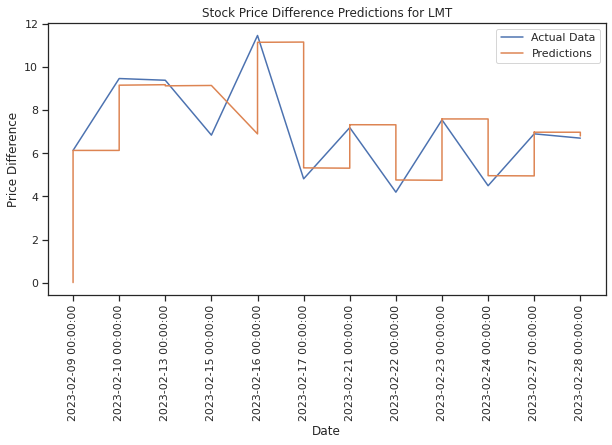

26 26


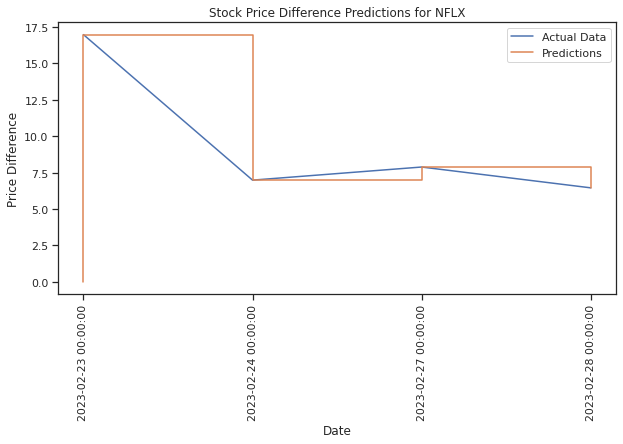

42 42


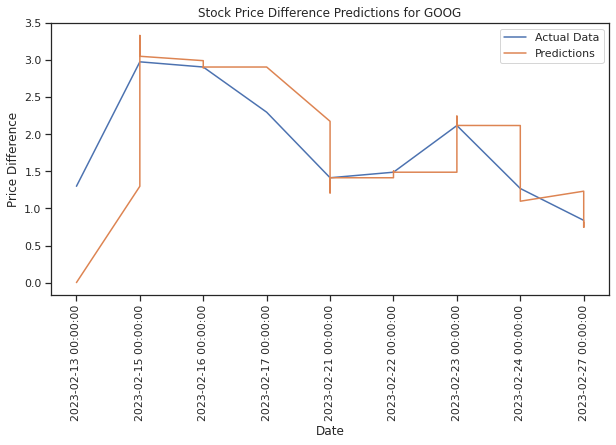

43 43


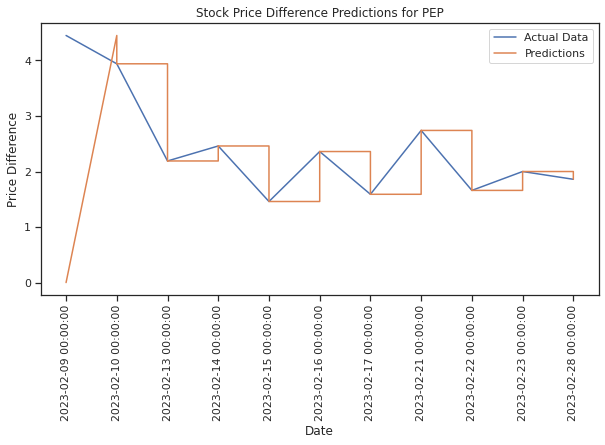

70 70


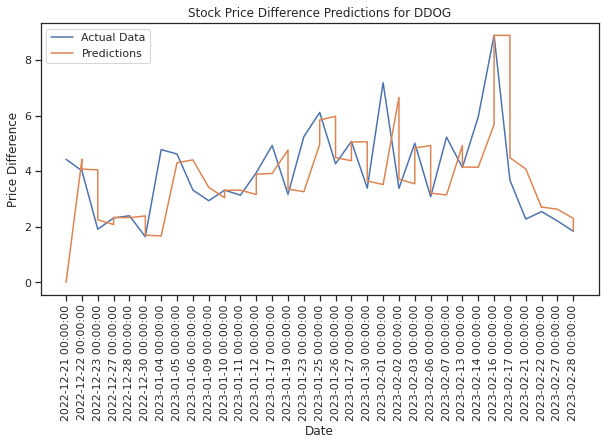

87 87


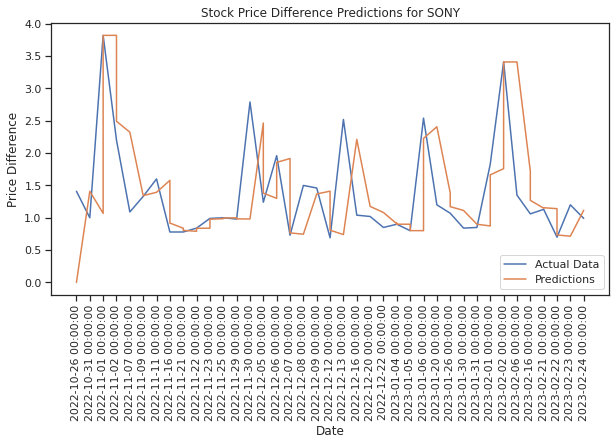

54 54


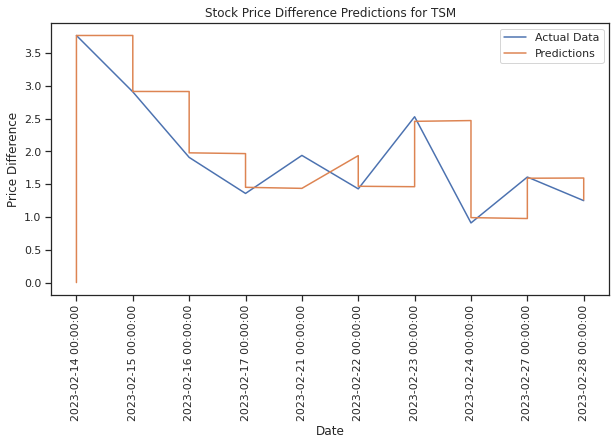

27 27


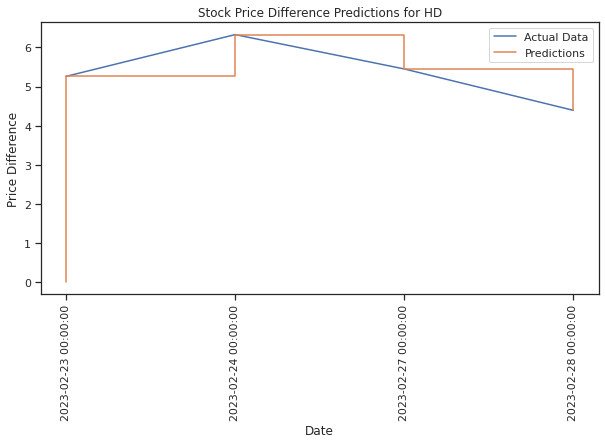

43 43


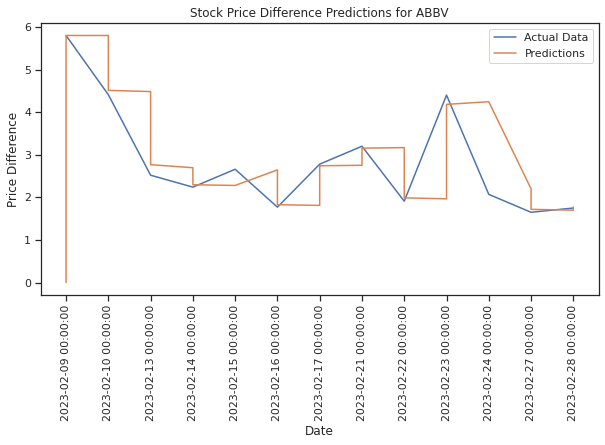

43 43


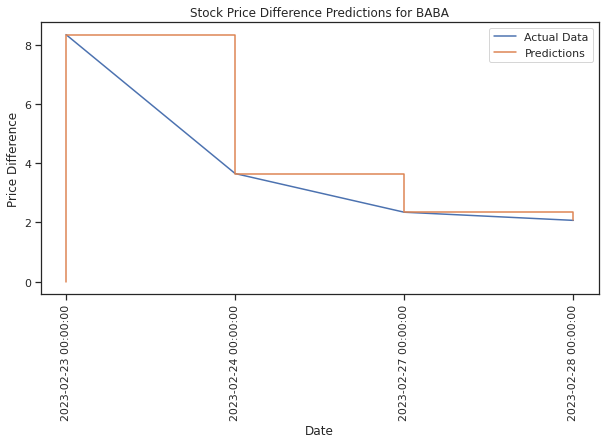

In [98]:
import statsmodels.api as sm

for company in companies:
  date=[]
  stock_price_diff=[]
  for el in sentiment_list:
    if el[1]==company:
      sent_score=0
      if el[0]>=0:
        sent_score=1
      diff_stock=el[4]-el[5]
      stock_price_diff.append(diff_stock)
      date.append(el[2])

  # Fit an ARIMA model to the data
  model = sm.tsa.ARIMA(stock_price_diff, order=(1,1,1))
  results = model.fit()

  # Use the model to make predictions on the data
  start_index = 0
  end_index = len(stock_price_diff)-1
  predictions = results.predict(start=start_index, end=end_index)

  print(len(date),len(stock_price_diff))
  # Plot the stock price difference data and the predictions
  plt.figure(figsize=(10, 5))
  plt.plot(date, stock_price_diff, label='Actual Data')
  plt.plot(date[start_index:end_index+1], predictions, label='Predictions')
  plt.title('Stock Price Difference Predictions for {}'.format(company))
  plt.xlabel('Date')
  plt.ylabel('Price Difference')
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()


  
